In [1]:
import numpy as np
from keras.models import load_model

def assess_images(test_images):
    model_paths = [
    '../Label0/Models/class_FIN0_overallbestFIN.keras',
    '../Label1/Models/class_FIN1_overallbestFIN.keras',
    '../Label23/Models/class_FINJ_overallbestFIN.keras',
    '../Label4/Models/class_FIN4_overallbestFIN.keras',
    '../Label5/Models/class_FIN5_overallbestFIN.keras',
    ]
    models = [load_model(path) for path in model_paths]
    results = np.zeros((test_images.shape[0], len(models)), dtype=int)
    for i, model in enumerate(models):
        predictions = model.predict(test_images)
        results[:, i] = (predictions > 0.5).astype(int).flatten()
    return results
    
base_array = 'Arrays/'
test_images = np.load(f'{base_array}/images.npy')

test_images = np.expand_dims(test_images, axis=-1)
test_images = np.repeat(test_images, 3, axis=-1)

print(test_images.shape)
results = assess_images(test_images)

save_location = 'Arrays/Joint_results.npy'
np.save(save_location, results)

print(f'Results binary array saved to {save_location}')


2025-02-01 15:51:41.389650: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.

KeyboardInterrupt



/opt/conda/lib/python3.11/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting seaborn

Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)

Requirement already satisfied: numpy!=1.24.0,>=1.20 in /opt/conda/lib/python3.11/site-packages (from seaborn) (1.26.4)

Requirement already satisfied: pandas>=1.2 in /opt/conda/lib/python3.11/site-packages (from seaborn) (2.2.3)

Requirement already satisfied: matplotlib!=3.6.1,>=3.4 in /opt/conda/lib/python3.11/site-packages (from seaborn) (3.9.3)

Requirement already satisfied: contourpy>=1.0.1 in /opt/conda/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.3.1)

Requirement already satisfied: cycler>=0.10 in /opt/conda/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (0.12.1)

Requirement already satisfied: fonttools>=4.22.0 in /opt/conda/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (4.55.3)

Requirement already satisfied: kiwisolver>=1.3.1 in /opt/conda/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.4.7)

Requirement already satisfied: packaging>=20.0 in /opt/conda/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (24.2)

Requirement already satisfied: pillow>=8 in /opt/conda/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (10.4.0)

Requirement already satisfied: pyparsing>=2.3.1 in /opt/conda/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (3.2.0)

Requirement already satisfied: python-dateutil>=2.7 in /opt/conda/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (2.9.0.post0)

Requirement already satisfied: pytz>=2020.1 in /opt/conda/lib/python3.11/site-packages (from pandas>=1.2->seaborn) (2023.3)

Requirement already satisfied: tzdata>=2022.7 in /opt/conda/lib/python3.11/site-packages (from pandas>=1.2->seaborn) (2024.2)

Requirement already satisfied: six>=1.5 in /opt/conda/lib/python3.11/site-packages (from python-dateutil>=2.7->matplotlib!=3.6.1,>=3.4->seaborn) (1.17.0)

Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

Installing collected packages: seaborn

Successfully installed seaborn-0.13.2

(4856, 5)
(4856, 5)


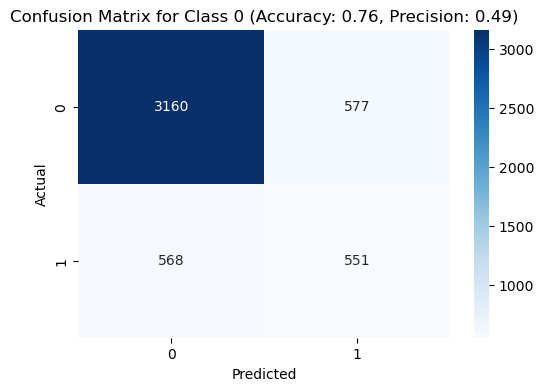

Accuracy for Class 0: 0.76
Precision for Class 0: 0.49
FNR for Class 0: 0.51


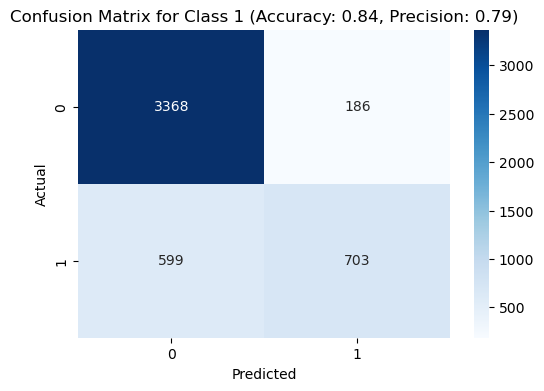

Accuracy for Class 1: 0.84
Precision for Class 1: 0.79
FNR for Class 1: 0.46


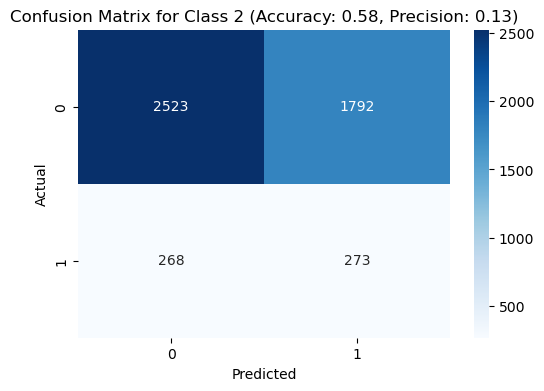

Accuracy for Class 2: 0.58
Precision for Class 2: 0.13
FNR for Class 2: 0.50


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


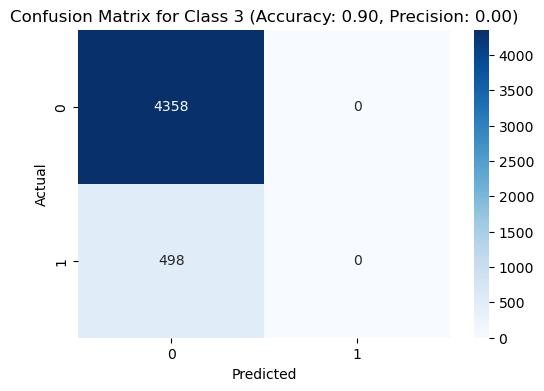

Accuracy for Class 3: 0.90
Precision for Class 3: 0.00
FNR for Class 3: 1.00


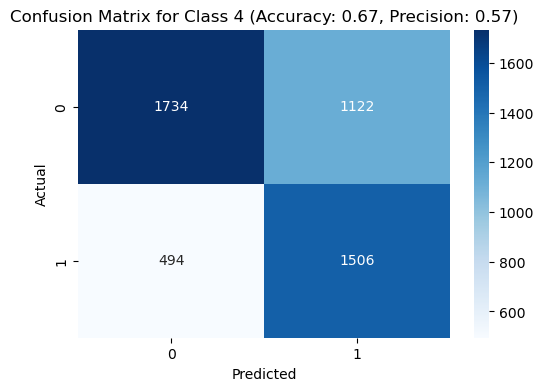

Accuracy for Class 4: 0.67
Precision for Class 4: 0.57
FNR for Class 4: 0.25


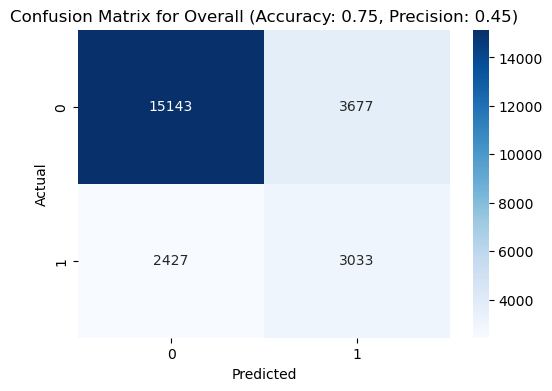

Accuracy for Overall: 0.75
Precision for Overall: 0.45
FNR for Overall: 0.44


In [2]:
import numpy as np
import pip
pip.main(['install','seaborn'])
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

def plot_confusion_matrix(y_true, y_pred, class_name):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    TP = cm[1, 1]
    FN = cm[1, 0]
    FNR = FN / (TP + FN)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {class_name} (Accuracy: {accuracy:.2f}, Precision: {precision:.2f})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print(f'Accuracy for {class_name}: {accuracy:.2f}')
    print(f'Precision for {class_name}: {precision:.2f}')
    print(f'FNR for {class_name}: {FNR:.2f}')

true_labels = np.load('Arrays/labels.npy')
results = np.load('Arrays/Joint_results.npy')

print (true_labels.shape)
print (results.shape)

for i in range(results.shape[1]):
    plot_confusion_matrix(true_labels[:, i], results[:, i], f'Class {i}')

overall_true = true_labels.flatten()
overall_pred = results.flatten()
plot_confusion_matrix(overall_true, overall_pred, 'Overall')

In [2]:
import numpy as np

def calculate_exact_match_percentage(true_labels, predicted_labels):
    if true_labels.shape[0] != predicted_labels.shape[0]:
        raise ValueError("Shape mismatch")

    exact_matches = np.all(true_labels == predicted_labels, axis=1)
    exact_match_percentage = np.mean(exact_matches) * 100
    return exact_match_percentage

percentage = calculate_exact_match_percentage(true_labels, results)
print(f'Exact match percentage: {percentage:.2f}%')

Exact match percentage: 23.64%
